# Lecture 9

## Function approximation with global functions continued

Legendre polynomials $\{P_j(x)\}_{j=0}^N, x \in [-1, 1]$ form a basis for the space of all polynomials with order smaller than or equal to $N$. This space is normally denoted as $\mathbb{P}_N$. The Galerkin method for approximating $u(x)$ in the space of polynomials $\mathbb{P}_N$ would normally be formulated as: find $u_N \in \mathbb{P}_N$ such that

$$
(u-u_N, v) = 0, \quad \forall \, v \in \mathbb{P}_N.
$$(eq-project)

Here there is no mentioning of the Legendre polynomials as there is no need for them yet. But the Legendre polynomials $\{P_j\}_{j=0}^N$ may now be chosen as a basis for $\mathbb{P}_N$ and we can solve Eq. {eq}`eq-project` using this basis. The Legendre polynomials are a very good basis because they are orthogonal in $L^2([-1, 1])$ 

$$
\left(P_i, P_j\right)_{L^2([-1,1])} = \frac{2}{2i+1}\delta_{ij}
$$

and very well suited for approximating other smooth functions. However, the Legendre polynomials are not the only possible basis for $\mathbb{P}_N$. We can just as easily choose the $\{x^j\}_{j=0}^N$ and use this basis to solve Eq. {eq}`eq-project`. But the basis functions $x^j$ are not orthogonal and the approach is less efficient even though we get exactly the same result. The choice of basis functions is actually very important for the efficiency!

```{admonition} Nodal vs modal basis
The Legendre polynomials are often classified as a **modal** basis. A modal basis is not connected in any way to mesh points. The Lagrange polynomials, on the other hand, are often referred to as a **nodal** basis because they rely on mesh points. 
```

We will now introduce yet another modal polynomial basis that is generally considered to be even better than Legendre: The Chebyshev polynomials!


### Chebyshev polynomials

The Chebyshev polynomials can be defined in their most simple and useful form as

$$
T_k(x) = \cos(k \cos^{-1}(x)), \quad k \in (0, 1, \ldots, N),
$$(eq-chebT)

for $x \in [-1, 1]$. Admittedly, this does not look like polynomials at all, it looks like cosine functions! However, an alternative definition is the recursive form

$$
\begin{align*}
T_0(x) &= 1, \\
T_1(x) &= x, \\
T_2(x) &= 2x^2-1, \\
&\vdots \\
T_{j+1}(x) &= 2xT_{j}(x) - T_{j-1}(x).
\end{align*}
$$

The first 5 polynomials are shown in the figure below

(fig-Chebyshev)=

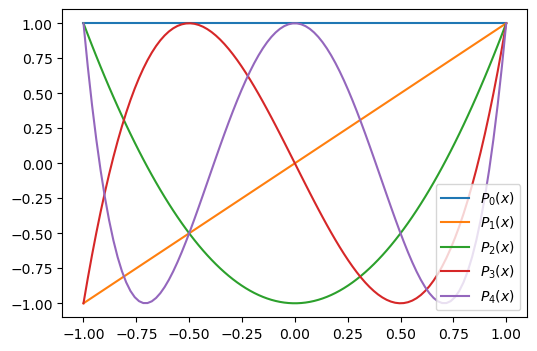

In [1]:
import numpy as np
import sympy as sp 
import matplotlib.pyplot as plt 

x = sp.Symbol('x')
fig, ax = plt.subplots(figsize=(6, 4))
xj = np.linspace(-1, 1, 100)
legend = []
for n in range(5):
    ax.plot(xj, np.cos(n*np.arccos(xj)))
    legend.append(f'$P_{n}(x)$')
ax.legend(legend);

It is noteworthy that all polynomials oscillate between $-1$ and $1$. And all polynomials ($j>0$) have maximum and minimum values of exactly 1 and -1. All the $N+1$ extrema points of $T_N(x)$ are

$$
x_j = \cos\left(\frac{j \pi}{N}\right), \quad j \in (0, 1, \ldots, N),
$$(eq-chebpoints)

which are called the Chebyshev points. Another set of points are all the roots of $T_N(x)$

$$
x_j = \cos\left( \frac{(2j+1)\pi}{2N}\right), \quad j \in (0, 1, \ldots, N-1).
$$(eq-chebroots)

The roots are often called the Chebyshev-Gauss points because of their importance in numerical integration through [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature).

```{note}
Both the roots and the extrema are cosine functions. If we choose $x=\cos \theta, \, \theta \in [0, \pi]$, then Eq. {eq}`eq-chebT` becomes

$$
T_k(x) = T_k(\cos \theta) =  \cos\left(k \theta \right) 
$$
```

Chebyshev polynomials are very efficient to work with because of the link to the cosine function. The cosine function provides an explicit expression that is easy and efficient to evaluate. The Legendre polynomials, on the other hand, do not have such a nice explicit expression and need to rely on the recursive equation {eq}`eq-Legrecursive` for evaluation.

The Chebyshev polynomials form a basis for $\mathbb{P}_N$, just like the Legendre polynomials. However, the Chebyshev polynomials are not orthogonal in the $L^2([-1, 1])$ space! As such, they are not usually used with the Galerkin formulation in Eq. {eq}`eq-project`.

The Chebyshev polynomials are, on the other hand, orthogonal in a special weighted inner product space. We define the weighted $L^2_{\omega}(\Omega)$ inner product as

$$
(f, g)_{L^2_{w}(\Omega)} = \int_{\Omega} f(x)g(x)\omega(x)d\Omega,
$$

where $\omega(x)$ is a special weight function. For Chebyshev polynomials defined in $\Omega = [-1, 1]$ the weight function $\omega(x) = 1/\sqrt{1-x^2}$. For simplicity we will write the weighted inner product as $(f, g)_{\omega}$. 

The Chebyshev polynomials are orthogonal in $L^2_{\omega}([-1, 1])$ and we can easily get

$$
\left(T_j, T_i \right)_{\omega} = \frac{c_i \pi}{2}\delta_{ij},
$$(eq-chebortho)

where $c_0=2$ and $c_i = 1$ for $i > 0$. 

For Chebyshev polynomials the approximation problem is now solved with the Galerkin method in the $L^2_{\omega}$ space: find $u(x) \in \mathbb{P}_N$ such that

$$
(u-u_N, v)_{\omega} = 0, \quad \forall \, v \in \mathbb{P}_N.
$$(eq-chebproject)

Other than the special definition of the inner product, the usage is exactly the same as for the Legendre polynomials. Only the integral is changed.

For a problem where $x \in [a, b]$ we need to map the true domain to the reference domain, exactly like for the Legendre polynomials. We start with the general definition

$$
(u(x)-u_N(x), \psi_i(x))_{\omega} = \int_{a}^b (u(x)-u_N(x)) \psi_i(x) \omega(x) dx = 0, \quad \forall i \in (0, 1, \ldots, N)
$$(eq-weightedGalerkin)

which is just a regular Galerkin method using a weighted inner product. Like for Legendre, we use the basis functions in the reference domain, $\psi_j(x) = T_j(X)$ and the function $u(x)$ needs a mapping $u(x(X))$, where $x(X)$ means that we compute the physical coordinate $x$ from the reference $X$. The only new thing is the weight function and this weight function is defined for the reference domain: $\omega(X(x))$. Naturally, the Chebyshev weight $\omega(X) = 1/\sqrt{1-X^2}$ only makes sense for the domain $X \in (-1, 1)$ because the denominator $1-X^2$ approaches zero for these two edges.

With this in mind we perform a change of variables for {eq}`eq-weightedGalerkin` where only the function $u(x(X))$ is written with a mapped argument. The remaining functions are all defined for the reference coordinate $X$

$$
\sum_{j=0}^N \int_{-1}^1 T_j  T_i \omega \, \frac{dx}{dX} \, dX \, \hat{u}_j =  \int_{-1}^1 u(x(X)) T_i \omega \, \frac{dx}{dX} \, dX, \quad \forall \, i \in (0, 1, \ldots, N)
$$

As for Legendre the $dx/dX$ term is constant and can be neglected. We get

$$
\sum_{j=0}^N  (T_j, T_i)_{L_{\omega}^2([-1,1])} \, \hat{u}_j = (u(x(X)), T_i)_{L_{\omega}^2([-1,1])} \quad \forall \, i \in (0, 1, \ldots, N)
$$(eq-cheb0)

Using the orthogonality {eq}`eq-chebortho` in {eq}`eq-cheb0` we get the Chebyshev expansion coefficients

$$
\hat{u}_i = \frac{2}{c_i \pi}\left(u(x(X)), T_i\right)_{\omega} \quad \forall \, i \in (0, 1, \ldots, N).
$$(eq-cheb-coeff)

This should be compared with the Legendre coefficients:

$$
\hat{u}_i = \frac{2i+1}{2} \left( u(x(X)), P_i \right) \quad \forall \, i \in (0, 1, \ldots, N).
$$(eq-leg-coeff)

So for both methods it all boils down to one integral.


The weighted inner product requires some extra attention, though. We need to implement the weighted integral

$$
(f, T_i)_{\omega} = \int_{-1}^1 \frac{f(x)T_i(x)}{\sqrt{1-x^2}}dx,
$$

which looks intimidating. However, we now remember the Chebyshev link with the cosine function and change variables with $x=\cos \theta$

$$
(f, T_i)_{\omega} = \int_{\pi}^{0} \frac{f(\cos \theta)T_i(\cos \theta)}{\sqrt{1-\cos^2 \theta}} \frac{d \cos \theta}{d \theta} d\theta.
$$

Furthermore, we can insert for $ 1-\cos^2\theta = \sin^2\theta$ and swap both the direction of the integration and the sign, which leads to

$$
(f, T_i)_{\omega}= \int_{0}^{\pi} f(\cos \theta)T_i(\cos \theta) d\theta.
$$

Since $T_i(\cos \theta) = \cos (i \theta)$ we get the much simpler integral

$$
(f, T_i)_{\omega} = \int_{0}^{\pi} f(\cos \theta)\cos (i \theta) d\theta.
$$(eq-scalarproductT)

Using this integral we get the Chebyshev coefficients

$$
\hat{u}_i = \frac{2}{c_i \pi}\int_{0}^{\pi} u(x(\cos \theta)) \cos(i \theta) d\theta \quad \forall \, i \in (0, 1, \ldots, N).
$$(eq-chebcoeff)

Lets try this with a few examples. First we define the exact weighted inner product


In [2]:
import numpy as np
import sympy as sp

x = sp.Symbol('x', real=True)
k = sp.Symbol('k', integer=True, positive=True)

Tk = lambda k, x: sp.cos(k * sp.acos(x))
cj = lambda j: 2 if j == 0 else 1

def innerw(u, v, domain, ref_domain=(-1, 1)):
    A, B = ref_domain
    a, b = domain
    # map u(x(X)) to use reference coordinate X. 
    # Note that x is here ref coord.
    us = u.subs(x, a + (b-a)*(x-A)/(B-A)) 
    # Change variables x=cos(theta)
    us = sp.simplify(us.subs(x, sp.cos(x)), inverse=True)
    vs = sp.simplify(v.subs(x, sp.cos(x)), inverse=True)
    return sp.integrate(us*vs, (x, 0, sp.pi))


Note the use of the Sympy function simplify with `inverse=True`, which is required for Sympy to use that $\cos^{-1}\cos x = x$. 

Compute the Chebyshev coefficients for $u(x) = 10(x-1)^2-1, \, x \in [1, 2]$:

In [3]:
a, b = 1, 2
u = 10*(x-1)**2-1
uhat = lambda u, j: 2 / (cj(j) * sp.pi) * innerw(u, Tk(j, x), (a, b))

```{note}
The function $u(x)$ is defined in the true physical domain with $x \in [a, b]$. Inside the `innerw` function we map this to $u(x(X))$

$$
u(x(X)) = 10\left(a+\frac{b-a}{B-A}(X-A) -1 \right)^2-1
$$

But we never explicitly create a new symbol X. We just substitute the function $u$'s coordinate $x$ for $a+(b-a)(x-A)/(B-A)$ and use $x$ as the reference coordinate.
```

In [4]:
uhj = uhat(u, 0), uhat(u, 1), uhat(u, 2), uhat(u, 3), uhat(u, 4)
uhj

(11/4, 5, 5/4, 0, 0)

Note that just like for Legendre 3 coefficients are enough to capture the second order polynomial exactly. For plotting we can use the Numpy class [Chebyshev](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.Chebyshev.html#numpy.polynomial.chebyshev.Chebyshev) with the computed expansion coefficients

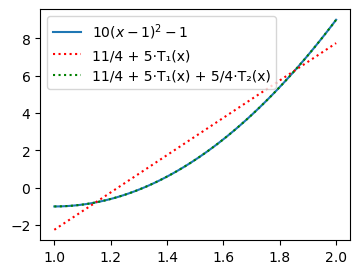

In [5]:
from numpy.polynomial import Chebyshev
plt.figure(figsize=(4, 3))
xj = np.linspace(1, 2, 100)
C2 = Chebyshev(uhj[:2], domain=(1, 2))
C3 = Chebyshev(uhj[:3], domain=(1, 2))
plt.plot(xj, sp.lambdify(x, u)(xj))
plt.plot(xj, C2(xj), 'r:')
plt.plot(xj, C3(xj), 'g:')
plt.legend(['$10(x-1)^2-1$', f'{C2}', f'{C3}']);

Lets try the more difficult function 

$$
u(x) = \exp(\cos x), \quad x \in [-1, 1].
$$

Since the weighted inner product now becomes difficult (at least timeconsuming) for Sympy to integrate exactly, we create a numerical weighted inner product as well.

In [6]:
from scipy.integrate import quad
def innerwn(u, v, domain, ref_domain=(-1, 1)):
    A, B = ref_domain
    a, b = domain
    us = u.subs(x, a + (b-a)*(x-A)/(B-A)) 
    us = sp.simplify(us.subs(x, sp.cos(x)), inverse=True)
    vs = sp.simplify(v.subs(x, sp.cos(x)), inverse=True)
    return quad(sp.lambdify(x, us*vs), 0, np.pi)[0]

u = sp.exp(sp.cos(x))
#u = 1 / (1+16*x**2)
#uhat = lambda u, j: 2 / (cj(j) * sp.pi) * innerw(u, Tk(j, x), (-1, 1)) # slow
uhatn = lambda u, j: 2 / (cj(j) * np.pi) * innerwn(u, Tk(j, x), (-1, 1))

The function `uhatn` computes the Chebyshev expansion coefficients corresponding to Eq. {eq}`eq-chebcoeff` and we compute the 25 first coefficients below. For comparison we also compute the 25 first Legendre coefficients as well, corresponding to Eq. {eq}`eq-legcoeff`.

In [7]:
uc = []
N = 25
for n in range(N):
    uc.append(uhatn(u, n))

# For Legendre:
from numpy.polynomial import Legendre
def innern(u, v):
    uj = lambda xj: sp.lambdify(x, u)(xj)*v(xj)
    return quad(uj, -1, 1)[0]
uj = lambda u, j: (2*j+1) * innern(u, Legendre.basis(j))/2
ul = []
for n in range(N):
    ul.append(uj(u, n))

```{note}
Note the numerical implementation of the Legendre inner product. Here we could have used simply

    def innern(u, v):
        return quad(sp.lambdify(x, u*v), -1, 1)[0]
    uj = lambda u, j: (2*j+1) * innern(u, sp.legendre(j, x))/2

However, this is much more susceptible to roundoff errors. Just try it!
```

Plot both Chebyshev and Legendre coefficients in a semilogarithmic plot. Since all the odd coefficients are zero for both Chebyshev and Legendre, we plot only the even coefficients. The odd coefficients are zero because $u(x)$ is an even function. The Chebyshev and Legendre polynomials are all such that $\psi_{2i}(x)$ are even, whereas $\psi_{2i+1}(x)$ are odd. See the {ref}`Chebyshev basis functions <fig-Chebyshev>`.


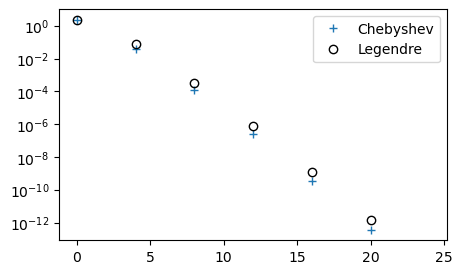

In [8]:
plt.figure(figsize=(5, 3))
plt.semilogy(np.arange(0, N, 2), uc[::2], '+', 
             np.arange(0, N, 2), ul[::2], 'ko', fillstyle='none')
plt.legend(['Chebyshev', 'Legendre']);

We note that the Chebyshev coefficients are smaller than the Legendre. This is an indication that the Chebyshev polynomials are performing better. However, to say something about the true accuracy we really need to compute the $L^2$ error norm. Below we compute the $L^2$ error norm (note, not a weighted norm) for both Legendre and Chebyshev as a function of $N$.

In [9]:
from numpy.polynomial import Legendre

def L2_error(uh, ue, space=Legendre):
    xj = np.linspace(-1, 1, 1000)
    uej = sp.lambdify(x, ue)(xj)
    err = []
    for n in range(0, len(uh), 2):
        uj = space(uh[:(n+1)])(xj).astype(float)
        err.append(np.sqrt(np.trapz((uj-uej)**2, dx=xj[1]-xj[0])))
    return err

errc = L2_error(uc, u, Chebyshev)
errl = L2_error(ul, u, Legendre)

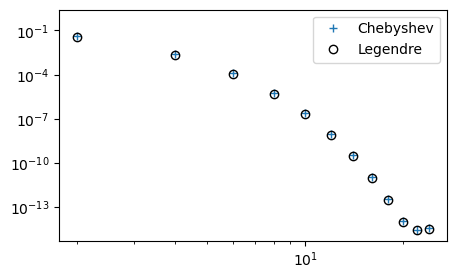

In [10]:
plt.figure(figsize=(5, 3))
plt.loglog(np.arange(0, N, 2), errc, '+', 
           np.arange(0, N, 2), errl, 'ko', fillstyle='none')
plt.legend(['Chebyshev', 'Legendre']);

So there is hardly any difference at all in accuracy.

```{note}
This very fast convergence down to machine precision is often referred to as spectral accuracy. It is actually faster than **any** finite difference method, which always leads to linear decay in the loglog plot above since the error in the finite difference method can be written as some integer order $r$, such that the error is $\mathcal{O}(\Delta x^r)$. 
```

### Two-dimensional functions

We can approximate a two-dimensional function $u(x, y) \in W$ as

$$
u(x, y) = \sum_{i=0}^M \hat{u}_{i}\Psi_{i}(x, y),
$$

where $\Psi_{i}(x, y)$ is a two-dimensional basis function and $\{\Psi_i(x, y)\}_{i=0}^M$ is a basis for the function space $W = \text{span}\{\Psi_i(x, y)\}_{i=0}^M$. 

There are not all that many two-dimensional basis functions and a more common approach is to use one basis function for the $x$-direction and another for the $y$-direction

$$
u(x, y) = \sum_{i=0}^M\sum_{j=0}^N \hat{u}_{ij}\psi_{i}(x) \varphi_j(y).
$$

The most straightforward approach is to use the same basis functions for both directions. For example, with a Chebyshev basis 

$$
u(x, y) = \sum_{i=0}^M\sum_{j=0}^N \hat{u}_{ij}T_{i}(x)T_j(y).
$$

The two spatial directions have their own domain on the real line, and we use $I_x = [a, b]$ for the $x$-direction and $ I_y = [c, d]$ for the $y$-direction. The domain is then the Cartesian product $\Omega = I_x \times I_y$.

We can define two one-dimensional function spaces for the two directions as $V_x = \text{span}\{\psi_i\}_{i=0}^M$ and $V_y = \text{span}\{\varphi_i\}_{i=0}^N$. A two-dimensional function space can then be created as 

$$
W = V_x \otimes V_y, \quad (x, y) \in \Omega.
$$

The function space $W$ is the *tensor product* of $V_x$ and $V_y$. 
The function space $W$ has a basis that is formed as the tensor product of the basis for $V_x$ and $V_y$. The 2D basis function $\Psi_{ij}$ is the tensor product of $\psi_i(x)$ and $\varphi_j(y)$

$$
\Psi_{ij}(x, y) = \psi_i(x) \varphi_j(y).
$$

This is also called the outer product, and sometimes also the dyadic product.

```{note}
[The Kronecker product](https://matmek-4270.github.io/matmek4270-book/lecture6.html#the-kronecker-product) is a tensor product.
```

The tensor product is related to the Cartesian product. It may actually be viewed as the Cartesian product *with multiplication*. Consider the Cartesian product of the two sets $(1, 2, 3)$ and $(4, 5)$

$$
(1, 2, 3) \times (4, 5) = \begin{bmatrix}
(1, 4) \\
(1, 5) \\
(2, 4) \\
(2, 5) \\
(3, 4) \\
(3, 5) \\
\end{bmatrix}
$$

and compare with the tensor product

$$
(1, 2, 3) \otimes (4, 5) = \begin{bmatrix}
1 \cdot 4 \\
1 \cdot 5 \\
2 \cdot 4 \\
2 \cdot 5 \\
3 \cdot 4 \\
3 \cdot 5 
\end{bmatrix}
= 
\begin{bmatrix}
4 \\
5 \\
8 \\
10 \\
12 \\
15 
\end{bmatrix}
$$

We see that the tensor product is in fact the Cartesian product with multiplication of the items in each set. The same applies to functions and function spaces. For $V_x = \text{span}\{\psi_0(x), \psi_1(x)\}$ and $V_y = \text{span}\{\varphi_0(y), \varphi_1(y)\}$ we have the Cartesian product of the bases

$$
(\psi_0, \psi_1) \times (\varphi_0, \varphi_1) = \begin{bmatrix}
\left(\psi_0, \varphi_0\right) \\
\left(\psi_0, \varphi_1\right) \\
\left(\psi_1, \varphi_0\right) \\
\left(\psi_1, \varphi_1\right) 
\end{bmatrix}
$$

Similarly, the tensor product is:

$$
(\psi_0, \psi_1) \otimes (\varphi_0, \varphi_1) = \begin{bmatrix}
\psi_0 \cdot \varphi_0 \\
\psi_0 \cdot \varphi_1 \\
\psi_1 \cdot \varphi_0 \\
\psi_1 \cdot \varphi_1 
\end{bmatrix}
$$

This tensor product is the basis for $W = V_x \otimes V_y$. Normally we would also shape the tensor product as a matrix. Here the first basis would be indexed as row and the second as column. This is the normal matrix indexing  $a_{ij}$, where $i$ as row and $j$ as column.

$$
\Psi_{ij}(x, y) = \psi_i(x) \varphi_j(y). 
$$

With matrix notation the tensor product can be understood as the matrix-matrix product of a column vector with a row vector:

$$
(\psi_0, \psi_1) \otimes (\varphi_0, \varphi_1) =  
\begin{bmatrix}
\psi_0 \\
\psi_1
\end{bmatrix}
\begin{bmatrix}
\varphi_0 & \varphi_1
\end{bmatrix} = 
\begin{bmatrix}
\psi_0 \cdot \varphi_0, \psi_0 \cdot \varphi_1 \\
\psi_1 \cdot \varphi_0, \psi_1 \cdot \varphi_1 
\end{bmatrix}
$$

For example, we can take the tensor product of the two bases $\{1, x\}$ and $\{1, y\}$ in Numpy:


In [11]:
y = sp.Symbol('y')
Vx = np.array([1, x])
Vy = np.array([1, y])
W = np.outer(Vx, Vy)
print(W)

[[1 y]
 [x x*y]]


This is exactly

$$
\begin{bmatrix}
1 \\
x
\end{bmatrix}
\begin{bmatrix}
1 & y
\end{bmatrix}
= 
\begin{bmatrix}
1 & y \\
x & xy
\end{bmatrix}
$$

Lets try to approximate $u(x,y) = \exp(-(x^2+2(y-0.5)^2))$, $(x, y) \in [-1, 1] \times [-1, 1]$ using Legendre polynomials and the Galerkin method. To this end we need the $L^2(\Omega)$ inner product

$$
\begin{align*}
(f, g) &= \int_{\Omega} f g d\Omega, \\
 &= \int_{-1}^1\int_{-1}^1 f(x,y)g(x,y)dxdy.
\end{align*}
$$

Note that the generic first line is identical to the definition used for the 1D case {eq}`eq-L2-inner`, except that $f$ and $g$ now are functions of both $x$ and $y$.

For simplicity we use Legendre polynomials in both directions with the same dimension and space $V_N = \text{span}\{P_i\}_{i=0}^N$ such that $W = V_N \otimes V_N$. We now want to find $u_N \in W$  such that

$$
(u - u_N, v) = 0, \quad \forall \, v \in W.
$$

This means to compute

$$
\int_{-1}^1\int_{-1}^1 \left(u - \sum_{i=0}^N \sum_{j=0}^N \hat{u}_{ij} P_i(x)P_j(y)\right) P_m(x)P_n(y) dx dy = 0, \quad \forall (m, n) \in \mathcal{I}_N^2,
$$(eq-project2D)

where the index set $\mathcal{I}_N = (0, 1, \ldots, N)$ and $\mathcal{I}_N^2 = \mathcal{I}_N \times \mathcal{I}_N$. The test function $v$ is here the tensor product basis function $P_m(x)P_n(y)$.

```{note}
Equation {eq}`eq-project2D` provides $(N+1)^2$ equations for the $(N+1)^2$ unknown in $\hat{U} = (\hat{u}_{ij})_{i,j=0}^N$.
```

Note that the unknown coefficients $\hat{u}_{ij}$ are independent of space and we can simplify the double integrals by separating them into one integral for $x$ and one for $y$. We get

$$
 \int_{-1}^1 \int_{-1}^1 P_i(x)P_j(y) P_m(x)P_n(y) dx dy = \underbrace{\int_{-1}^1 P_i(x)P_m(x)dx}_{a_{im}}  \underbrace{\int_{-1}^1 P_j(y) P_n(y) dy}_{a_{jn}}
$$

and we also write

$$
u_{mn} = \int_{-1}^1 \int_{-1}^1 u(x, y) P_m(x)P_n(y) dx dy.
$$

We can thus write Eq. {eq}`eq-project2D` as the linear algebra problem

$$
\sum_{i=0}^N \sum_{j=0}^N a_{im}a_{jn} \hat{u}_{ij} = u_{mn}.
$$

On matrix form this is 

$$
A \hat{U} A = U,
$$

which can be solved with the vec-trick as

$$
(A \otimes A) \text{vec}(\hat{U}) = \text{vec}(U).
$$

However, since $A$ is a diagonal matrix it is actually much easier to just avoid the vectorization and solve directly

$$
\hat{U} = A^{-1} U A^{-1}.
$$

Lets implement this and verify that the approximation is close to the exact solution. To this end we will now need to use the double integral functions [dblquad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html). The rest is fairly straight forward:

In [12]:
import scipy.sparse as sparse
from scipy.integrate import dblquad
ue = sp.exp(-(x**2+2*(y-sp.S.Half)**2))
uh = lambda i, j: dblquad(sp.lambdify((x, y), ue*sp.legendre(i, x)*sp.legendre(j, y)), -1, 1, -1, 1, epsabs=1e-12)[0]
N = 20
uij = np.zeros((N+1, N+1))
for i in range(N+1):
    for j in range(N+1):
        uij[i, j] = uh(i, j)

A = sparse.diags([2/(2*np.arange(N+1)+1)], [0], (N+1, N+1))
A_inv = sparse.diags([(2*np.arange(N+1)+1)/2], [0], (N+1, N+1))
uhat_ij = A_inv @ uij @ A_inv

At this point we have the coefficients $\hat{U}$. For comparison with the exact solution we will to compute the solution in real space for a uniform mesh (meshgrid)

$$
u(x_i, y_j) = \sum_{m=0}^N \sum_{n=0}^N \hat{u}_{mn} P_m(x_i)P_n(y_j).
$$

To this end we can make use of the Vandermonde matrix

$$
V = (P_j(x_i))_{i,j=0}^N,
$$

and then (since the mesh is the same in the $x$ and $y$ directions) we can simply compute

$$
U = V \hat{U} V^T.
$$

Below we implement this and compute the $l^2$ error norm using the exact solution.

(res-legendre-2d)=

In [13]:
xi = np.linspace(-1, 1, N+1)
V = np.polynomial.legendre.legvander(xi, N)
U = V @ uhat_ij @ V.T
xij, yij = np.meshgrid(xi, xi, indexing='ij', sparse=True)
ueij = sp.lambdify((x, y), ue)(xij, yij)
np.linalg.norm(U-ueij)

7.519715605065469e-10

Not bad at all. Lets try for a range of resolutions and plot the $L^2$ error norm as a function of N

In [14]:
def convergence(N):
    uij = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(N+1):
            uij[i, j] = uh(i, j) 
    A = sparse.diags([2/(2*np.arange(N+1)+1)], [0], (N+1, N+1))
    A_inv = sparse.diags([(2*np.arange(N+1)+1)/2], [0], (N+1, N+1))
    uhat_ij = A_inv @ uij @ A_inv
    xi = np.linspace(-1, 1, N+1)
    V = np.polynomial.legendre.legvander(xi, N)
    U = V @ uhat_ij @ V.T
    xij, yij = np.meshgrid(xi, xi, indexing='ij', sparse=True)
    ueij = sp.lambdify((x, y), ue)(xij, yij)
    h = xi[1]-xi[0]
    return np.sqrt(np.trapz(np.trapz((U-ueij)**2, dx=h), dx=h))

error = []
for n in range(4, 24, 2):
    error.append(convergence(n))

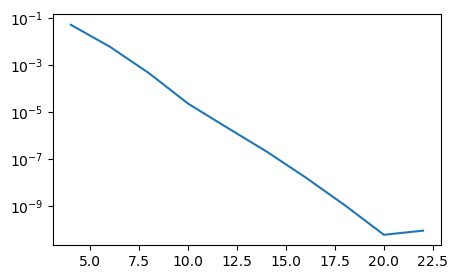

In [15]:
plt.figure(figsize=(5, 3))
plt.semilogy(np.arange(4, 24, 2), error);

Note the extremely fast convergence. Doubling the number of points in each direction from $N=10$ to $N=20$ leads to an error that descreses with 5 decades! This is spectral accuracy. At $N>20$ the solution does no longer improve because of roundoff errors and machine precision.

### External software

Two softwares that are using both Legendre and Chebyshev polynomials for global function approximation and to solve partial differential equations are:

* [Chebfun](https://www.chebfun.org)
* [Shenfun](https://github.com/spectralDNS/shenfun)

Chebfun is mainly focused on Chebyshev polynomials and it is written in MATLAB. Shenfun is written in Python and focuses on solving partial differential equations via the Galerkin method.

Lets try to approximate 

$$
u = \frac{1}{1+16x^2}, \quad x \in [-1, 1]
$$

using Shenfun:

In [16]:
import shenfun as sf

ue = 1 / (1+16*x**2)
N = 20
V = sf.FunctionSpace(N+1, 'Legendre', domain=(-1, 1))
v = sf.TestFunction(V)
uh = (2*np.arange(N+1)+1)/2*sf.inner(ue, v, assemble='exact')
#uh = sf.project(ue, V) # or just this

The code should be fairly easy to follow. We simply create the function space `V` $=\{P_i\}_{i=0}^{N}$, then a test function `v` from this space and then we compute the Legendre coefficients using the formula in Eq. {eq}`eq-leg-coeff`.

Note that there is a shortcut function [project](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.project.project) that projects $u(x)$ to the chosen space and basis in one line of code.

We can plot the difference between the computed function and the exact function on a uniform mesh of length 1000:

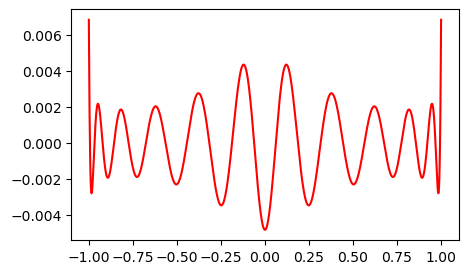

In [17]:
xj = np.linspace(-1, 1, 1000)
plt.figure(figsize=(5, 3))
plt.plot(xj, uh(xj)-sp.lambdify(x, ue)(xj), 'r');

Notice how the error oscillates all throughout the domain. This is typical of spectral methods.

Lets do exactly the same for Chebyshev polynomials:

In [18]:
%%capture
C = sf.FunctionSpace(N+1, 'Chebyshev', domain=(-1, 1))
v = sf.TestFunction(C)
cj = np.ones(N+1)
cj[0] = 2
uhc = 2/(cj*np.pi)*sf.inner(ue, v, assemble='adaptive')
#uhc = sf.project(ue, C) # or just this

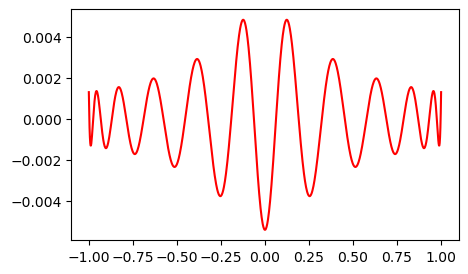

In [19]:
plt.figure(figsize=(5, 3))
plt.plot(xj, uhc(xj)- sp.lambdify(x, ue)(xj), 'r');

We see that the error is very similar to the Legendre, but slightly better towards the edges.

Two- and three-dimensional problems can also be solved using shenfun and tensor products. Lets try to approximate $u(x, y) = \exp(-(x^2+2(y-0.5)^2)$ using Legendre polynomials in both directions and a tensor product function space.


In [20]:
ue = sp.exp(-(x**2+2*(y-sp.S.Half)**2))
N = 20
V = sf.FunctionSpace(N+1, 'Legendre')
W = sf.TensorProductSpace(sf.comm, (V, V))
uh = sf.project(ue, W)

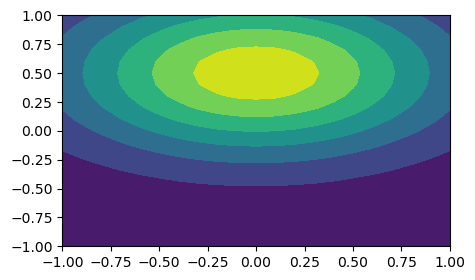

In [21]:
xij, yij = W.local_mesh(True, kind='uniform')
plt.figure(figsize=(5, 3))
plt.contourf(xij, yij, uh.backward(mesh='uniform'));

In [22]:
np.linalg.norm(uh.backward(mesh='uniform')-sp.lambdify((x, y), ue)(xij, yij))

7.165842587697159e-10

which is very similar to the already computed {ref}`above <res-legendre-2d>` without the use of Shenfun. 

### Fast Chebyshev transforms - (optional)

Besides the closed form, the Chebyshev polynomials have another advantage over Legendre. The Chebyshev series can make use of fast Cosine transforms (similar to fast Fourier transforms) when evaluating a series for Chebyshev points.

Assume that the coefficients $\{\hat{u}_j\}_{j=0}^N$ are known and you want to evaluate this series on $N+1$ points in physical space

$$
u(x_i) = \sum_{j=0}^N \hat{u}_j T_j(x_i), \quad i \in (0, 1, \ldots, N).
$$

Normally this can be computed as a matrix vector product 

$$
\boldsymbol{u} = \text{T} \boldsymbol{\hat{u}}
$$(eq-chebvander)

where the Vandermonde matrix $\text{T} = (t_{ij})_{i,j=0}^N, t_{ij} = T_j(x_i)$ is of shape $(N+1) \times (N+1)$. The cost of this operation is $(2N+1)(N+1)$ floating point operations, and of leading order $\mathcal{O}(N^2)$
.
```{note}
We compute the number of floating point operations for the matrix-vector product as follows: for each of the $N+1$ rows in the matrix $\text{T}$, we hold $i$ constant and compute $\sum_{j=0}^N t_{i, j} \cdot \hat{u}_j$. This requires $N+1$ multiplications and $N$ additions, so a total of $2N+1$ flops. Since there are $N+1$ rows in the matrix $\text{T}$, this is repeated $N+1$ times. The total cost is as such $(N+1)(2N+1)$ flops.
```

The matrix $\text{T}$ can be computed using [np.polynomial.chebyshev.chebvander](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebvander.html), which can take any vector of points $\{x_i\}$, not necessarily of shape $N+1$.


In [23]:
T = np.polynomial.chebyshev.chebvander(np.cos(np.arange(5)*np.pi/4), 5)

In [24]:
np.set_printoptions(precision=3, suppress=True)
T

array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ],
       [ 1.   ,  0.707,  0.   , -0.707, -1.   , -0.707],
       [ 1.   ,  0.   , -1.   , -0.   ,  1.   ,  0.   ],
       [ 1.   , -0.707, -0.   ,  0.707, -1.   ,  0.707],
       [ 1.   , -1.   ,  1.   , -1.   ,  1.   , -1.   ]])

Now the column $j$ in $\text{T}$ represents the numbers $\{T_j(x_i)\}_{i=0}^N$, that is, the basis function $T_j$ evaluated on the mesh points $\{x_i\}_{i=0}^N$.

We can now evaluate {eq}`eq-chebvander` for any $\boldsymbol{\hat{u}}$ simply as

In [25]:
uhat = np.array([0, 1, 0, 1, 0, 1])
T @ uhat

array([ 3.   , -0.707,  0.   ,  0.707, -3.   ])

Because of the choice of $\hat{u} = (0, 1, 0, 1, 0, 1)$ we are now simply computing

$$
u(\boldsymbol{x}) = T_1(\boldsymbol{x}) + T_3(\boldsymbol{x}) + T_5(\boldsymbol{x}),
$$

where $\boldsymbol{x} = \{\cos(i \pi /5)\}_{i=0}^5$.

This matrix vector product is the straight forward approach that costs what it costs to do a matrix vector product. However, since the Vandermonde matrix $\text{T}$ contains evaluated cosines, we can do better. 

Lets evaluate the Chebyshev series at the Chebyshev points {eq}`eq-chebpoints`: $x_i = \cos(i \pi /N), i \in 0, 1, \ldots, N$. Using the definition of Chebyshev polynomials {eq}`eq-chebT` we get

$$
\begin{align*}
u(x_i) &= \sum_{j=0}^N \hat{u}_j \cos(j \cos^{-1}(x_i)), \\
 &= \sum_{j=0}^N \hat{u}_j \cos(j i \pi / N),\\
 &= \hat{u}_0 + (-1)^i \hat{u}_N + \sum_{j=1}^{N-1} \hat{u}_j \cos(j i \pi / N),
\end{align*}
$$(eq-uxi)

for $i \in (0, 1, \ldots, N)$.

The [discrete cosine transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.dct.html) of type 1 is defined to transform the real numbers $\boldsymbol{y} = \{y_i\}_{i=0}^N$ into $\boldsymbol{Y}=\{Y_i\}_{i=0}^N$ such that

$$
\boldsymbol{Y} = DCT^{1}(\boldsymbol{y}).
$$

From the definition in Scipy we get that this $DCT^{1}$ really computes

$$
Y_i = y_0 + (-1)^i y_N + 2 \sum_{j=1}^{N-1} y_j \cos({ji\pi}/{N}), \quad i \in (0, 1, \ldots, N).
$$

This is almost the same as {eq}`eq-uxi`, except that the sum has a factor 2 in front. But we can work around this. A minor reformulation leads to

$$
\frac{Y_i + y_0 + (-1)^i y_N}{2} = y_0 + (-1)^i y_N + \sum_{j=1}^{N-1} y_j \cos({ji\pi}/{N}), \quad i \in (0, 1, \ldots, N).
$$

where the right hand side now is exactly like in {eq}`eq-uxi`. So we need to compute

$$
u(\boldsymbol{x}) = \frac{DCT^{1}(\boldsymbol{\hat{u}}) + \hat{u}_0 + I_m \hat{u}_N}{2}
$$

where $I_m = \{(-1)^{i}\}_{i=0}^N$. We can implement this as shown in the function `evaluate_cheb_1` below

In [26]:
import scipy

def evaluate_cheb_1(uhat):
    N = len(uhat)
    uj = scipy.fft.dct(uhat, type=1)
    uj += uhat[0]
    uj[::2] += uhat[-1]
    uj[1::2] -= uhat[-1]
    uj *= 0.5
    return uj

Lets make sure that this function computes the same as the matrix vector product defined above.

In [27]:
N = 1000
xi = np.cos(np.arange(N+1)*np.pi/N)
T = np.polynomial.chebyshev.chebvander(xi, N)
uhat = np.ones(N+1)
uj = T @ uhat
uj_fast = evaluate_cheb_1(uhat)
assert np.allclose(uj, uj_fast)

Since the assert is ok this means that the fast transform works.

Lets check the speed of the transforms

In [28]:
%timeit -n 10 uj_fast = evaluate_cheb_1(uhat)

The slowest run took 4.31 times longer than the fastest. This could mean that an intermediate result is being cached.
65.5 µs ± 45.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%timeit -n 10 uj = T @ uhat

168 µs ± 59.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Not a big difference, but this difference will become larger for larger arrays, because the cost of the fast transform is only $\mathcal{O}(N \log_2 N)$. Also, the DCT from scipy is not very efficient. Faster versions are available from [FFTW](https://www.fftw.org), wrapped for usage in Python through [mpi4py-fft](https://github.com/mpi4py/mpi4py-fft).

## Weekly assignments

Experiment with the Chebyshev Galerkin method and approximate the same global functions that was considered with Legendre and collocation last week.

1. $u(x) = |x|, \quad x \in [-1, 1]$
2. $u(x) = \exp(\sin(x)), \quad x \in [0, 2]$
3. $u(x) = x^{10}, \quad x \in [0, 1]$
4. $u(x) = \exp(-(x-0.5)^2) - \exp(-0.25) \quad x \in [0, 1]$
5. $u(x) = J_0(x), \quad x \in [0, 100]$
